In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)
x = np.random.normal(0, 1, 1000)
y = 2*x + np.random.normal(0, 1, 1000)

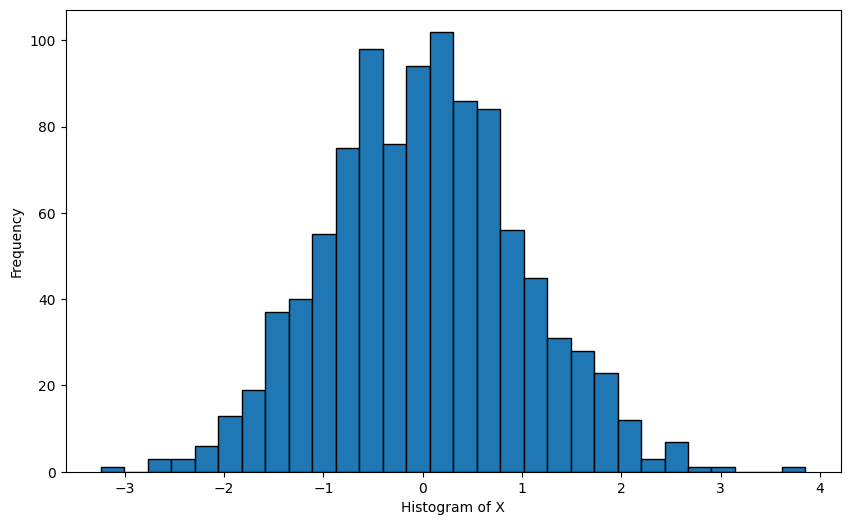

In [3]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(x, bins=30, edgecolor='black')
plt.xlabel('Histogram of X')
plt.ylabel('Frequency')
plt.show()

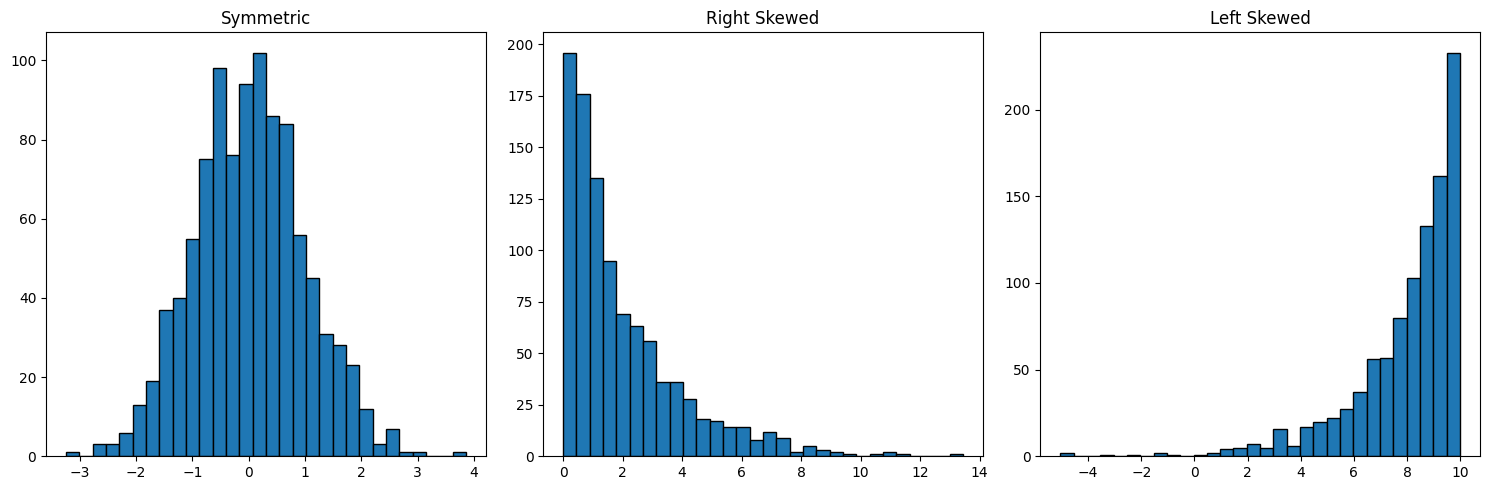

In [5]:
# Skewed Histogram
right_skewed = np.random.exponential(2, 1000)
left_skewed = 10 - np.random.exponential(2, 1000)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 5))
ax1.hist(x, bins=30, edgecolor='black')
ax1.set_title('Symmetric')
ax2.hist(right_skewed, bins=30, edgecolor='black')
ax2.set_title('Right Skewed')
ax3.hist(left_skewed, bins=30, edgecolor='black')
ax3.set_title('Left Skewed')
plt.tight_layout()
plt.show()

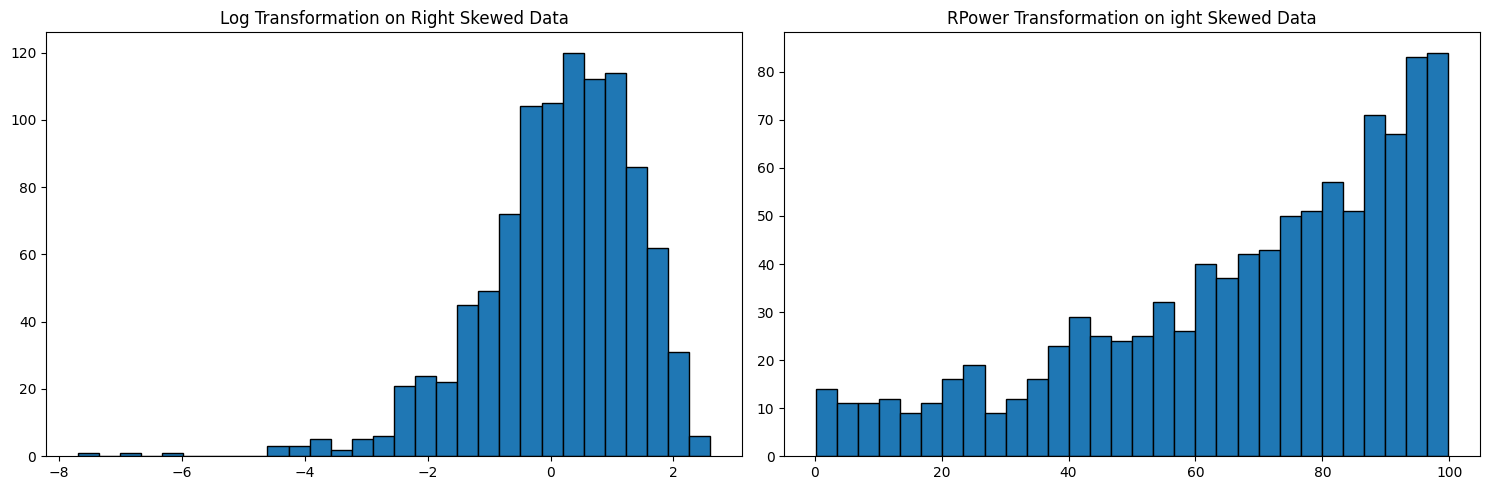

In [12]:
log_transformation = np.log(right_skewed)
power_transformation = np.power(left_skewed, 2)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))
ax1.hist(log_transformation, bins=30, edgecolor='black')
ax1.set_title('Log Transformation on Right Skewed Data')
ax2.hist(power_transformation, bins=30, edgecolor='black')
ax2.set_title('Power Transformation on ight Skewed Data')
plt.tight_layout()
plt.show()

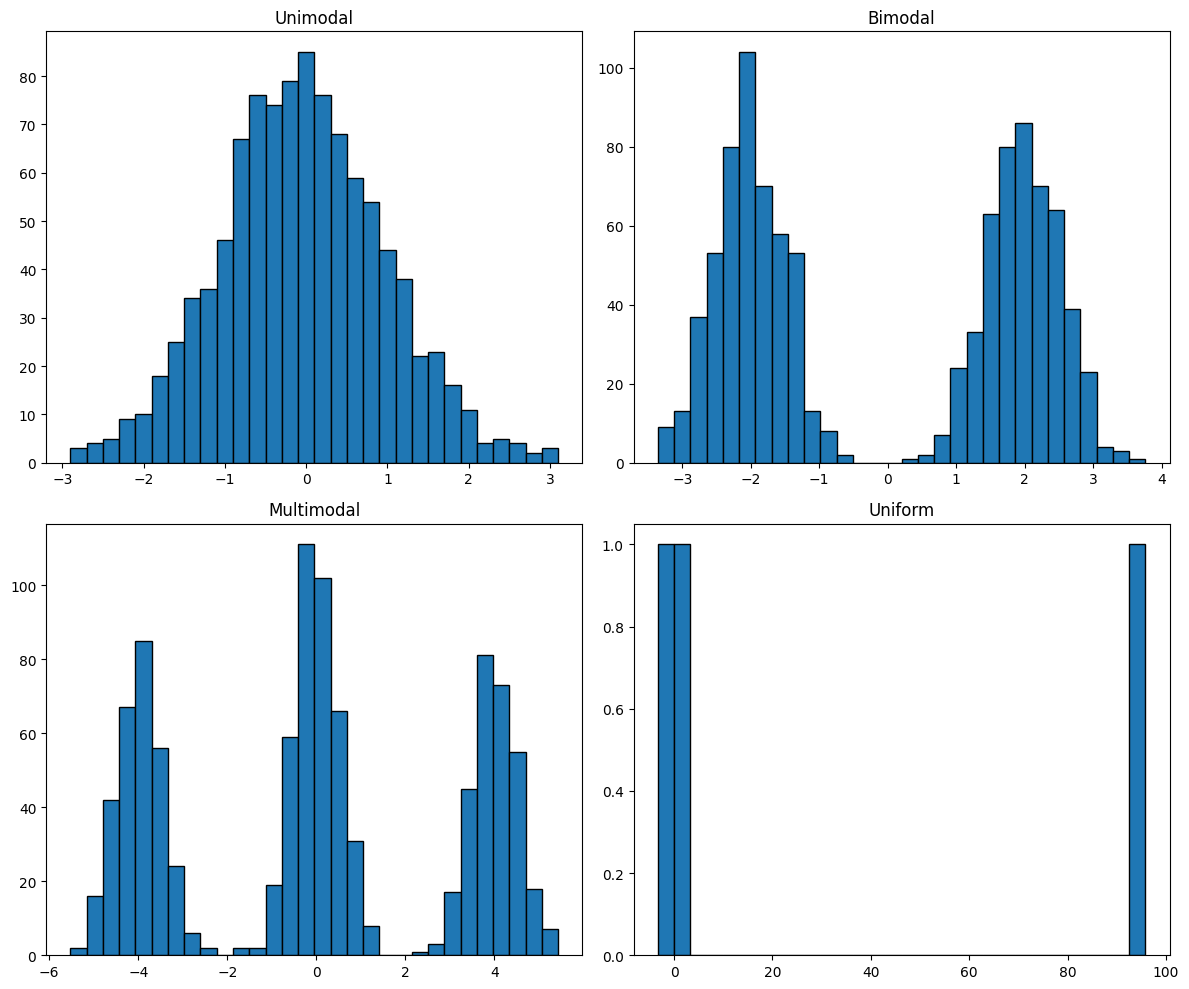

In [6]:
# Histograms with different modes
unimodal = np.random.normal(0, 1, 1000)
bimodal = np.concatenate([np.random.normal(-2, 0.5, 500), np.random.normal(2, 0.5, 500)])
multimodal = np.concatenate([np.random.normal(-4, 0.5, 300), np.random.normal(0, 0.5, 400),
                             np.random.normal(4, 0.5, 300)])
uniform = np.random.uniform((-4, 4, 1000))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.hist(unimodal, bins=30, edgecolor='black')
ax1.set_title('Unimodal')
ax2.hist(bimodal, bins=30, edgecolor='black')
ax2.set_title('Bimodal')
ax3.hist(multimodal, bins=30, edgecolor='black')
ax3.set_title('Multimodal')
ax4.hist(uniform, bins=30, edgecolor='black')
ax4.set_title('Uniform')
plt.tight_layout()
plt.show()

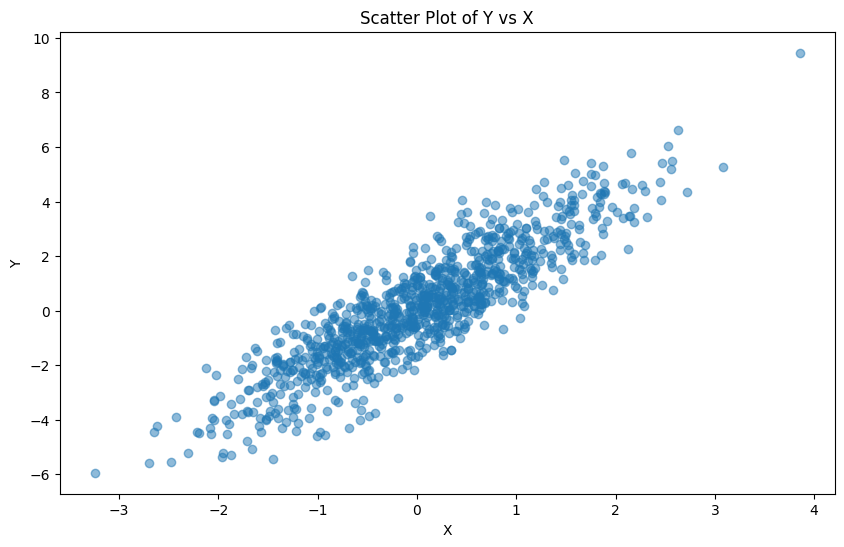

In [7]:
# Boxplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Y vs X')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Covariance between X and Y: 1.8782682146398448
Correlation between X and Y: 1.9190946352227403
Pearson's Correlation Coefficient: PearsonRResult(statistic=0.8873663623612613, pvalue=0.0)


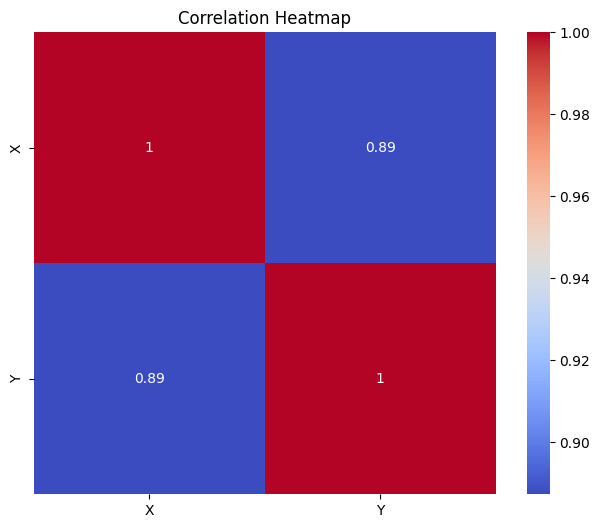

In [9]:
# Covariance and Correlation
covariance = np.cov(x, y)[0,1]
correlation = np.cov(x, y)[0,1] / (np.std(x))

print(f"Covariance between X and Y: {covariance}")
print(f"Correlation between X and Y: {correlation}")

# Pearson's Correlation Coefficient
pearson_corr = stats.pearsonr(x, y)
print(f"Pearson's Correlation Coefficient: {pearson_corr}")

# Correlation Heatmap
data = pd.DataFrame({'X': x, 'Y': y})
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Probability

In [1]:
import numpy as np
from itertools import product

# 1. Sample Space
def create_sample_space(experiment):
    if experiment == "die":
        return set(range(1, 7))
    elif experiment == "coin":
        return {"H", "T"}
    else:
        raise ValueError("Unsupported Experiment")
    
# 2. Random Sample
def random_sample(population, sample_size):
    return np.random.choice(population, size=sample_size, replace=False)

# 3. Events
def is_event(outcome, event):
    return outcome in event

# 4. Probability Function
def probability(event, sample_space):
    return len(event) / len(sample_space)

# 5. Complement of an Event
def complement(event, sample_space):
    return sample_space - event

# 6. Types of Events
def joint_probability(event_a, event_b, sample_space):
    joint_event = event_a.intersection(event_b)
    return probability(joint_event, sample_space)

def are_disjoint(event_a, event_b):
    return len(event_a.intersection(event_b)) == 0

def conditional_probability(event_a, event_b, sample_space):
    joint_prob = joint_probability(event_a, event_b, sample_space)
    prob_b = probability(event_b, sample_space)
    return joint_prob / prob_b if prob_b > 0 else 0

def are_independent(event_a, event_b, sample_space):
    joint_prob = joint_probability(event_a, event_b, sample_space)
    prob_a = probability(event_a, sample_space)
    prob_b = probability(event_b, sample_space)
    return np.isclose(joint_prob, prob_a * prob_b)

# Example usage
die_space = create_sample_space("die")
print("Sample Space (Die):", die_space)

event_even = {2, 4, 6}
print("P(Even):", probability(event_even, die_space))

event_gt3 = {4, 5, 6}
print("P(>3):", probability(event_gt3, die_space))

print("Complement of Even:", complement(event_even, die_space))
print("P(Not Even):", probability(complement(event_even, die_space), die_space))

print("Joint P(Even and >3):", joint_probability(event_even, event_gt3, die_space))
print("Are Even and >3 disjoint?", are_disjoint(event_even, event_gt3))
print("P(Even | >3):", conditional_probability(event_even, event_gt3, die_space))
print("Are Even and >3 independent?", are_independent(event_even, event_gt3, die_space))

# Example with coins
coin_space = create_sample_space("coin")
two_coin_space = set(product(coin_space, coin_space))
print("\nSample Space (Two Coins):", two_coin_space)

event_at_least_one_head = {outcome for outcome in two_coin_space if 'H' in outcome}
print("P(At least one head):", probability(event_at_least_one_head, two_coin_space))

Sample Space (Die): {1, 2, 3, 4, 5, 6}
P(Even): 0.5
P(>3): 0.5
Complement of Even: {1, 3, 5}
P(Not Even): 0.5
Joint P(Even and >3): 0.3333333333333333
Are Even and >3 disjoint? False
P(Even | >3): 0.6666666666666666
Are Even and >3 independent? False

Sample Space (Two Coins): {('T', 'T'), ('H', 'T'), ('T', 'H'), ('H', 'H')}
P(At least one head): 0.75


## Conditional Probability

In [2]:
# Bayes Theorem
def bayes_theorem(prior, likelihood, marginal):
    return (likelihood * prior) / marginal

# Medical diagnosis example
# Probability of having the disease (prior)
P_disease = 0.01

# Probability of positive test result given the disease (likelihood)
P_positive_given_disease = 0.95

# Probability of positive test result given no disease (false positive rate)
P_positive_given_no_disease = 0.05

# Calculate marginal likelihood
P_positive = P_positive_given_disease * P_disease + P_positive_given_no_disease * (1 - P_disease)

# Calculate posterior probability
P_disease_given_positive = bayes_theorem(P_disease, P_positive_given_disease, P_positive)

print(f"Probability of having the disease given a positive test result: {P_disease_given_positive:.4f}")

Probability of having the disease given a positive test result: 0.1610


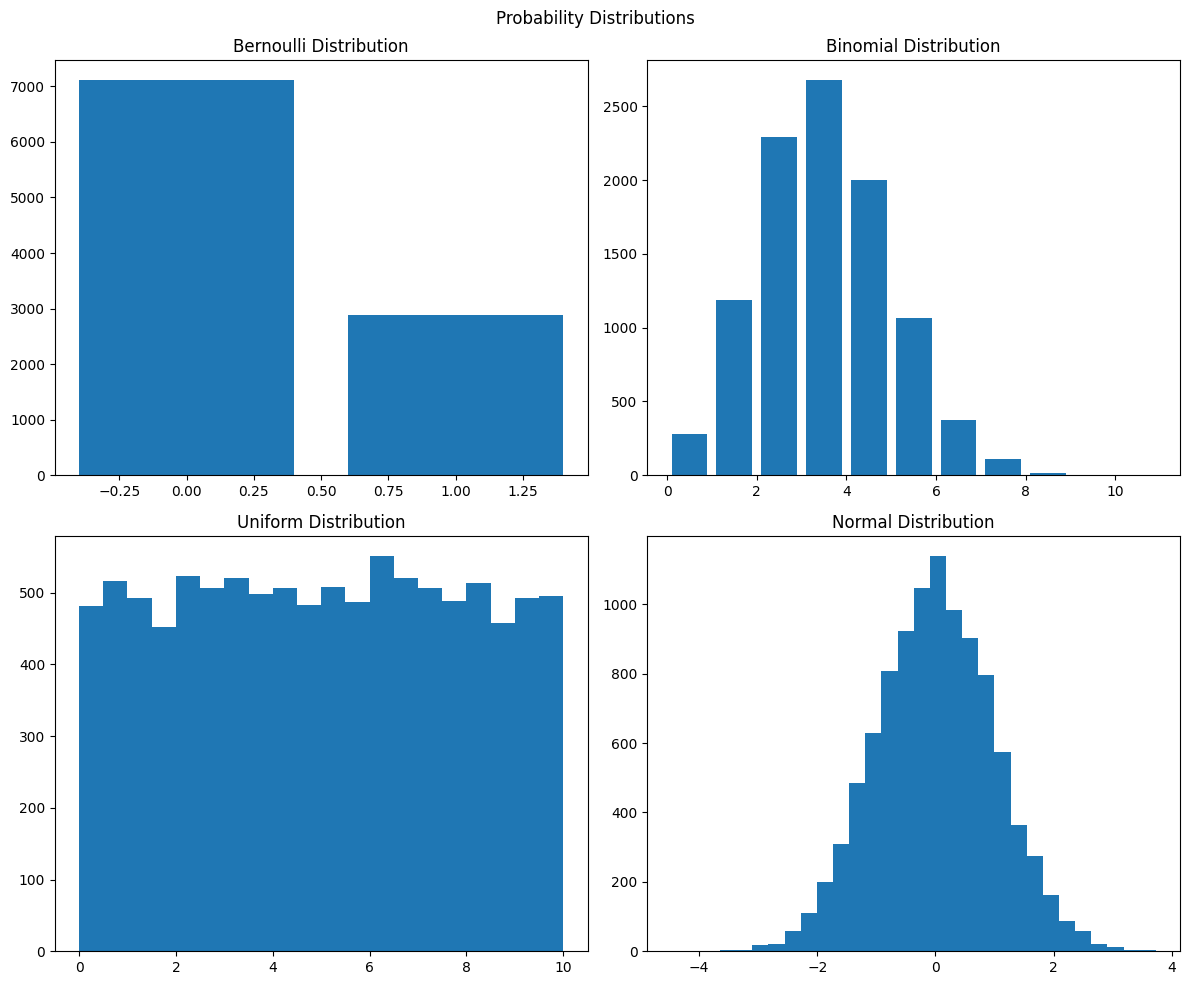

Z-score for x=2: 2.0

Original data statistics:
Mean: 9.99, Std: 5.16

Standardized data statistics:
Mean: -0.00, Std: 1.00

Normalized data statistics:
Mean: 0.50, Std: 0.21


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Sample sizes
n_samples = 10000

# Bernoulli Distribution
p_bernoulli = 0.3
bernoulli_samples = np.random.binomial(n=1, p=p_bernoulli, size=n_samples)

# Binomial Distribution
n_binomial, p_binomial = 10, 0.3
binomial_samples = np.random.binomial(n=n_binomial, p=p_binomial, size=n_samples)

# Uniform Distribution
a, b = 0, 10
uniform_samples = np.random.uniform(a, b, n_samples)

# Normal Distribution
mu, sigma = 0, 1
normal_samples = np.random.normal(mu, sigma, n_samples)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Probability Distributions")

axs[0, 0].hist(bernoulli_samples, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
axs[0, 0].set_title("Bernoulli Distribution")

axs[0, 1].hist(binomial_samples, bins=range(n_binomial+2), rwidth=0.8)
axs[0, 1].set_title("Binomial Distribution")

axs[1, 0].hist(uniform_samples, bins=20)
axs[1, 0].set_title("Uniform Distribution")

axs[1, 1].hist(normal_samples, bins=30)
axs[1, 1].set_title("Normal Distribution")

plt.tight_layout()
plt.show()

# Calculate and print z-scores
x = 2
z_score = (x - mu) / sigma
print(f"Z-score for x={x}: {z_score}")

# Standard Scaler vs Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = np.random.normal(loc=10, scale=5, size=(100, 1))

# Standard Scaler (Z-score normalization)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Min-Max Normalization
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(data)

print("\nOriginal data statistics:")
print(f"Mean: {np.mean(data):.2f}, Std: {np.std(data):.2f}")
print("\nStandardized data statistics:")
print(f"Mean: {np.mean(standardized_data):.2f}, Std: {np.std(standardized_data):.2f}")
print("\nNormalized data statistics:")
print(f"Mean: {np.mean(normalized_data):.2f}, Std: {np.std(normalized_data):.2f}")

# Inferential Statistics with Python


Population Statistics:
Mean: 169.98
Median: 169.97
Standard Deviation: 10.03
Minimum: 130.78
Maximum: 209.26

Small Sample Statistics:
Mean: 170.46
Median: 170.05
Standard Deviation: 11.38
Minimum: 147.94
Maximum: 192.76

Medium Sample Statistics:
Mean: 169.22
Median: 169.83
Standard Deviation: 9.54
Minimum: 144.79
Maximum: 194.40

Large Sample Statistics:
Mean: 169.61
Median: 169.56
Standard Deviation: 10.21
Minimum: 143.25
Maximum: 200.77


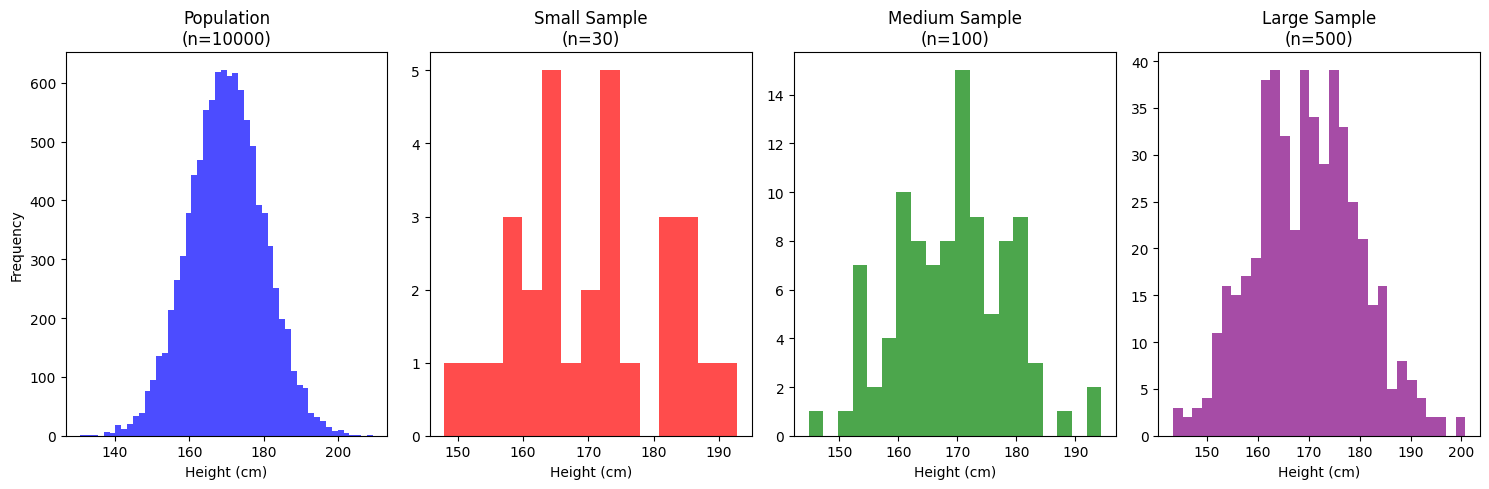

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Create a population (e.g., heights of all people in a city)
population = np.random.normal(loc=170, scale=10, size=10000)

# Take different sample sizes
small_sample = np.random.choice(population, size=30)
medium_sample = np.random.choice(population, size=100)
large_sample = np.random.choice(population, size=500)

# Visualize the differences
plt.figure(figsize=(15, 5))

# Population distribution
plt.subplot(141)
plt.hist(population, bins=50, alpha=0.7, color='blue')
plt.title('Population\n(n=10000)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Small sample
plt.subplot(142)
plt.hist(small_sample, bins=15, alpha=0.7, color='red')
plt.title('Small Sample\n(n=30)')
plt.xlabel('Height (cm)')

# Medium sample
plt.subplot(143)
plt.hist(medium_sample, bins=20, alpha=0.7, color='green')
plt.title('Medium Sample\n(n=100)')
plt.xlabel('Height (cm)')

# Large sample
plt.subplot(144)
plt.hist(large_sample, bins=30, alpha=0.7, color='purple')
plt.title('Large Sample\n(n=500)')
plt.xlabel('Height (cm)')

plt.tight_layout()

# Compare statistics
def print_statistics(data, name):
    print(f"\n{name} Statistics:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data):.2f}")
    print(f"Minimum: {np.min(data):.2f}")
    print(f"Maximum: {np.max(data):.2f}")

print_statistics(population, "Population")
print_statistics(small_sample, "Small Sample")
print_statistics(medium_sample, "Medium Sample")
print_statistics(large_sample, "Large Sample")

### Point Estimation

In [2]:
# Sample Mean
def sample_mean_example():
    # Generate population
    population = np.random.normal(loc=100, scale=15, size=10000)
    
    # Take sample
    sample = np.random.choice(population, size=100)
    
    # Calculate point estimate
    point_estimate = np.mean(sample)
    
    # Compare with true population parameter
    true_value = np.mean(population)
    
    print(f"True Population Mean: {true_value:.2f}")
    print(f"Sample Point Estimate: {point_estimate:.2f}")
    print(f"Estimation Error: {abs(true_value - point_estimate):.2f}")

sample_mean_example()

True Population Mean: 100.21
Sample Point Estimate: 99.98
Estimation Error: 0.23


In [3]:
# Sample Proportion
def sample_proportion_example():
    # Generate binary population (e.g., success/failure)
    population = np.random.binomial(n=1, p=0.7, size=10000)
    
    # Take sample
    sample = np.random.choice(population, size=100)
    
    # Calculate point estimates
    true_prop = np.mean(population)
    sample_prop = np.mean(sample)
    
    print(f"True Population Proportion: {true_prop:.2f}")
    print(f"Sample Proportion Estimate: {sample_prop:.2f}")
    print(f"Estimation Error: {abs(true_prop - sample_prop):.2f}")

sample_proportion_example()

True Population Proportion: 0.71
Sample Proportion Estimate: 0.75
Estimation Error: 0.04


In [4]:
# Sample Variance
def sample_variance_example():
    # Generate population
    population = np.random.normal(loc=100, scale=15, size=10000)
    
    # Take sample
    sample = np.random.choice(population, size=100)
    
    # Calculate point estimates
    true_var = np.var(population)
    sample_var = np.var(sample, ddof=1)  # ddof=1 for sample variance
    
    print(f"True Population Variance: {true_var:.2f}")
    print(f"Sample Variance Estimate: {sample_var:.2f}")
    print(f"Estimation Error: {abs(true_var - sample_var):.2f}")

sample_variance_example()

True Population Variance: 221.65
Sample Variance Estimate: 242.45
Estimation Error: 20.79


### Interval Estimation

In [5]:
def confidence_interval_example():
    # Generate sample data
    sample = np.random.normal(loc=100, scale=15, size=30)
    
    # Calculate confidence intervals
    confidence_levels = [0.90, 0.95, 0.99]
    
    for conf_level in confidence_levels:
        ci = stats.t.interval(confidence=conf_level,
                            df=len(sample)-1,
                            loc=np.mean(sample),
                            scale=stats.sem(sample))
        
        print(f"\n{conf_level*100}% Confidence Interval:")
        print(f"Lower Bound: {ci[0]:.2f}")
        print(f"Upper Bound: {ci[1]:.2f}")
        print(f"Interval Width: {ci[1]-ci[0]:.2f}")

confidence_interval_example()


90.0% Confidence Interval:
Lower Bound: 100.59
Upper Bound: 106.72
Interval Width: 6.12

95.0% Confidence Interval:
Lower Bound: 99.97
Upper Bound: 107.34
Interval Width: 7.37

99.0% Confidence Interval:
Lower Bound: 98.69
Upper Bound: 108.62
Interval Width: 9.94


### Confidence Interval

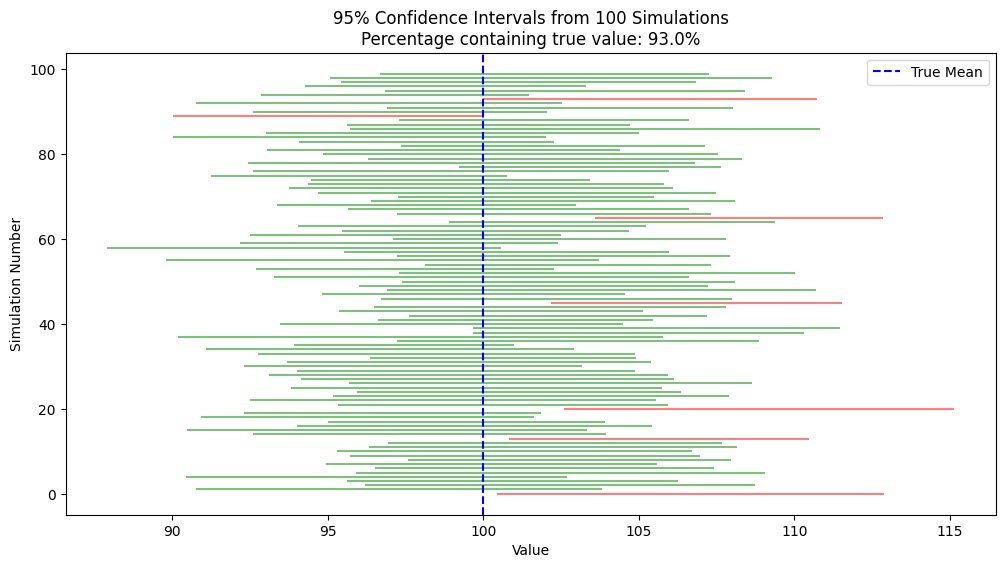

In [6]:
def demonstrate_confidence_intervals():
    # True population parameter
    true_mean = 100
    
    # Generate multiple samples and calculate CIs
    n_simulations = 100
    sample_size = 30
    confidence_level = 0.95
    
    # Store results
    contains_true_value = 0
    intervals = []
    
    for _ in range(n_simulations):
        # Generate sample
        sample = np.random.normal(loc=true_mean, scale=15, size=sample_size)
        
        # Calculate CI
        ci = stats.t.interval(confidence=confidence_level,
                            df=len(sample)-1,
                            loc=np.mean(sample),
                            scale=stats.sem(sample))
        
        # Check if CI contains true value
        if ci[0] <= true_mean <= ci[1]:
            contains_true_value += 1
        
        intervals.append(ci)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    y_positions = range(n_simulations)
    
    for i, (lower, upper) in enumerate(intervals):
        color = 'green' if lower <= true_mean <= upper else 'red'
        plt.plot([lower, upper], [i, i], color=color, alpha=0.5)
    
    plt.axvline(x=true_mean, color='blue', linestyle='--', label='True Mean')
    plt.ylabel('Simulation Number')
    plt.xlabel('Value')
    plt.title(f'95% Confidence Intervals from {n_simulations} Simulations\n'
              f'Percentage containing true value: {contains_true_value/n_simulations*100:.1f}%')
    plt.legend()
    
demonstrate_confidence_intervals()

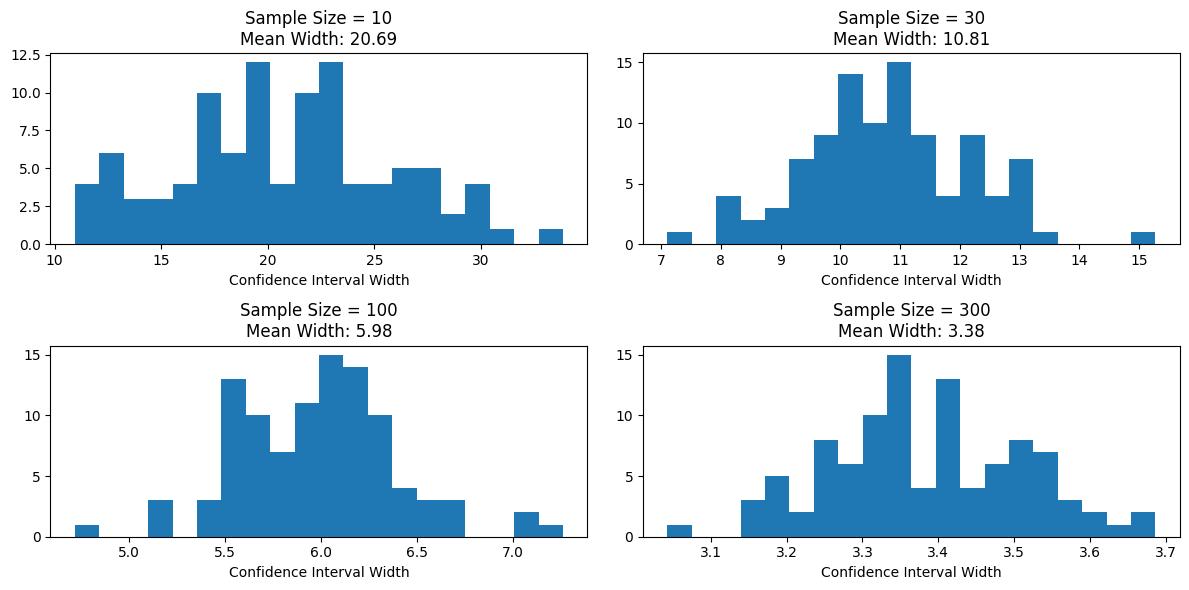

In [7]:
# ➡️ Factors Affecting Confidence Interval Width:
# Sample Size: Larger samples = narrower intervals
# Confidence Level: Higher confidence = wider intervals
# Population Variability: More variable populations = wider intervals
def compare_ci_factors():
    # Compare sample sizes
    sample_sizes = [10, 30, 100, 300]
    population = np.random.normal(loc=100, scale=15, size=10000)
    
    plt.figure(figsize=(12, 6))
    
    for i, n in enumerate(sample_sizes):
        samples = [np.random.choice(population, size=n) for _ in range(100)]
        cis = [stats.t.interval(0.95, df=len(s)-1, loc=np.mean(s), scale=stats.sem(s))
               for s in samples]
        
        widths = [upper - lower for (lower, upper) in cis]
        
        plt.subplot(2, 2, i+1)
        plt.hist(widths, bins=20)
        plt.title(f'Sample Size = {n}\nMean Width: {np.mean(widths):.2f}')
        plt.xlabel('Confidence Interval Width')
    
    plt.tight_layout()

compare_ci_factors()

### Student's T Distribution

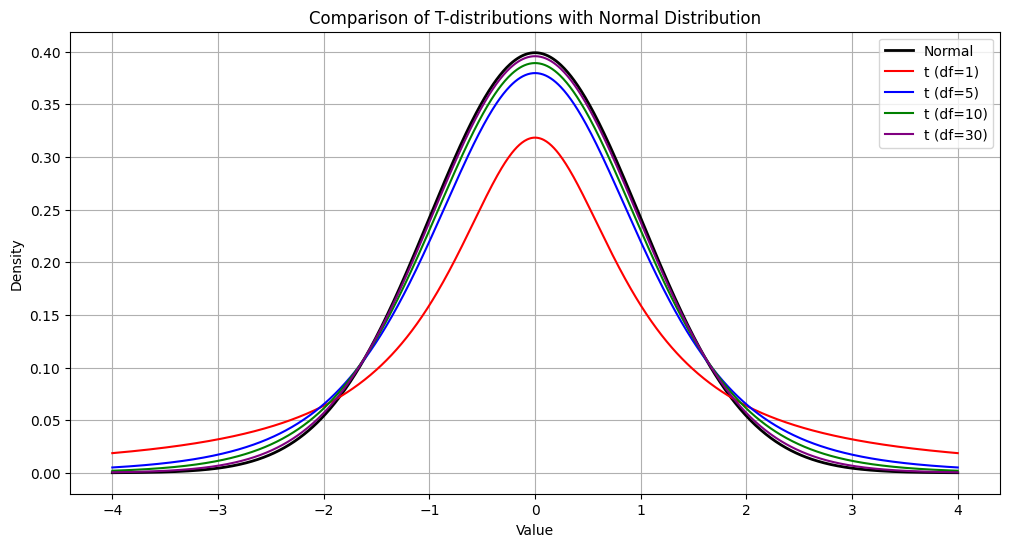

In [8]:
def visualize_t_distribution():
    x = np.linspace(-4, 4, 1000)
    
    # Plot different t-distributions
    plt.figure(figsize=(12, 6))
    
    # Add normal distribution
    plt.plot(x, stats.norm.pdf(x), 'k-', lw=2, label='Normal')
    
    # Add t-distributions with different df
    dfs = [1, 5, 10, 30]
    colors = ['red', 'blue', 'green', 'purple']
    
    for df, color in zip(dfs, colors):
        plt.plot(x, stats.t.pdf(x, df), color=color, 
                label=f't (df={df})')
    
    plt.title('Comparison of T-distributions with Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

visualize_t_distribution()

In [9]:
# ➡️ When to Use T-Distribution:
# Small sample size (n < 30)
# Population standard deviation unknown
# Data approximately normally distributed
def demonstrate_t_vs_z():
    # Generate sample
    sample_size = 20
    population_mean = 100
    population_std = 15
    
    sample = np.random.normal(loc=population_mean, 
                             scale=population_std, 
                             size=sample_size)
    
    # Calculate confidence intervals using both methods
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    
    # Z-interval (if we knew population std)
    z_ci = stats.norm.interval(0.95,
                              loc=sample_mean,
                              scale=population_std/np.sqrt(sample_size))
    
    # T-interval (when we don't know population std)
    t_ci = stats.t.interval(0.95,
                           df=sample_size-1,
                           loc=sample_mean,
                           scale=sample_std/np.sqrt(sample_size))
    
    print("Comparing Z and T intervals:")
    print(f"Z-interval: ({z_ci[0]:.2f}, {z_ci[1]:.2f})")
    print(f"T-interval: ({t_ci[0]:.2f}, {t_ci[1]:.2f})")
    print(f"Z-interval width: {z_ci[1]-z_ci[0]:.2f}")
    print(f"T-interval width: {t_ci[1]-t_ci[0]:.2f}")

demonstrate_t_vs_z()

Comparing Z and T intervals:
Z-interval: (96.03, 109.17)
T-interval: (94.86, 110.34)
Z-interval width: 13.15
T-interval width: 15.49


### Hypothesis Testing

Hypothesis Test Results:
Sample Mean: 73.36
t-statistic: 1.7589
p-value (two-tailed): 0.0913
p-value (one-tailed): 0.0457


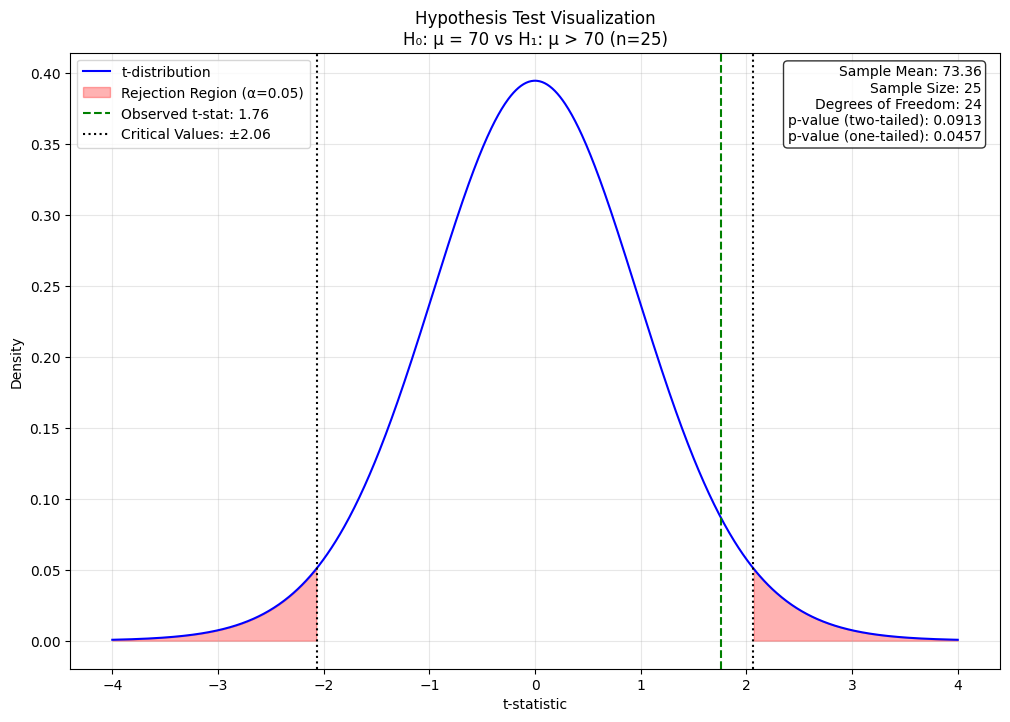


Test Interpretation:
--------------------------------------------------
At α = 0.05, we reject the null hypothesis.
There is sufficient evidence to conclude that the new teaching method
significantly improves test scores above 70.

Effect Size (Cohen's d): 0.3518
Effect size interpretation: small


In [10]:
def hypothesis_testing_example():
    # Example: Testing if a new teaching method improves test scores
    
    # Null Hypothesis (H₀): μ = 70 (old average)
    # Alternative Hypothesis (H₁): μ > 70 (new average is higher)
    
    # Generate sample data (new test scores)
    np.random.seed(42)  # for reproducibility
    sample_size = 25
    sample = np.random.normal(loc=75, scale=10, size=sample_size)
    
    # Perform one-sample t-test
    t_stat, p_value = stats.ttest_1samp(sample, popmean=70)
    
    # For one-tailed test, divide p-value by 2 (if t-stat is in the expected direction)
    p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - p_value / 2
    
    print("Hypothesis Test Results:")
    print(f"Sample Mean: {np.mean(sample):.2f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value (two-tailed): {p_value:.4f}")
    print(f"p-value (one-tailed): {p_value_one_tailed:.4f}")
    
    # Visualize the results
    plt.figure(figsize=(12, 8))
    
    # Create x values for t-distribution
    x = np.linspace(-4, 4, 1000)
    
    # Get degrees of freedom
    df = sample_size - 1
    
    # Plot t-distribution
    t_dist = stats.t.pdf(x, df)
    plt.plot(x, t_dist, 'b-', label='t-distribution')
    
    # Calculate critical values for two-tailed test (alpha = 0.05)
    critical_value = stats.t.ppf(0.975, df)  # 97.5th percentile for two-tailed test
    
    # Shade rejection regions for two-tailed test
    x_left = x[x <= -critical_value]
    x_right = x[x >= critical_value]
    plt.fill_between(x_left, stats.t.pdf(x_left, df), color='red', alpha=0.3, label='Rejection Region (α=0.05)')
    plt.fill_between(x_right, stats.t.pdf(x_right, df), color='red', alpha=0.3)
    
    # Add vertical line for observed t-statistic
    plt.axvline(x=t_stat, color='green', linestyle='--', label=f'Observed t-stat: {t_stat:.2f}')
    
    # Add vertical lines for critical values
    plt.axvline(x=-critical_value, color='black', linestyle=':', label=f'Critical Values: ±{critical_value:.2f}')
    plt.axvline(x=critical_value, color='black', linestyle=':')
    
    # Add labels and title
    plt.title("Hypothesis Test Visualization\n" + 
              f"H₀: μ = 70 vs H₁: μ > 70 (n={sample_size})")
    plt.xlabel('t-statistic')
    plt.ylabel('Density')
    
    # Add a legend
    plt.legend()
    
    # Add annotations for key information
    text_info = (f"Sample Mean: {np.mean(sample):.2f}\n"
                 f"Sample Size: {sample_size}\n"
                 f"Degrees of Freedom: {df}\n"
                 f"p-value (two-tailed): {p_value:.4f}\n"
                 f"p-value (one-tailed): {p_value_one_tailed:.4f}")
    
    plt.text(0.98, 0.98, text_info, 
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Show plot
    plt.show()
    
    # Add interpretation
    alpha = 0.05
    print("\nTest Interpretation:")
    print("-" * 50)
    if p_value_one_tailed < alpha:
        print(f"At α = {alpha}, we reject the null hypothesis.")
        print("There is sufficient evidence to conclude that the new teaching method")
        print("significantly improves test scores above 70.")
    else:
        print(f"At α = {alpha}, we fail to reject the null hypothesis.")
        print("There is insufficient evidence to conclude that the new teaching method")
        print("significantly improves test scores above 70.")
    
    # Effect size calculation (Cohen's d)
    cohens_d = (np.mean(sample) - 70) / np.std(sample, ddof=1)
    print(f"\nEffect Size (Cohen's d): {cohens_d:.4f}")
    
    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect = "negligible"
    elif abs(cohens_d) < 0.5:
        effect = "small"
    elif abs(cohens_d) < 0.8:
        effect = "medium"
    else:
        effect = "large"
    
    print(f"Effect size interpretation: {effect}")

# Run the example
hypothesis_testing_example()

### P-value and Statistical Significance

P-value: 0.0062


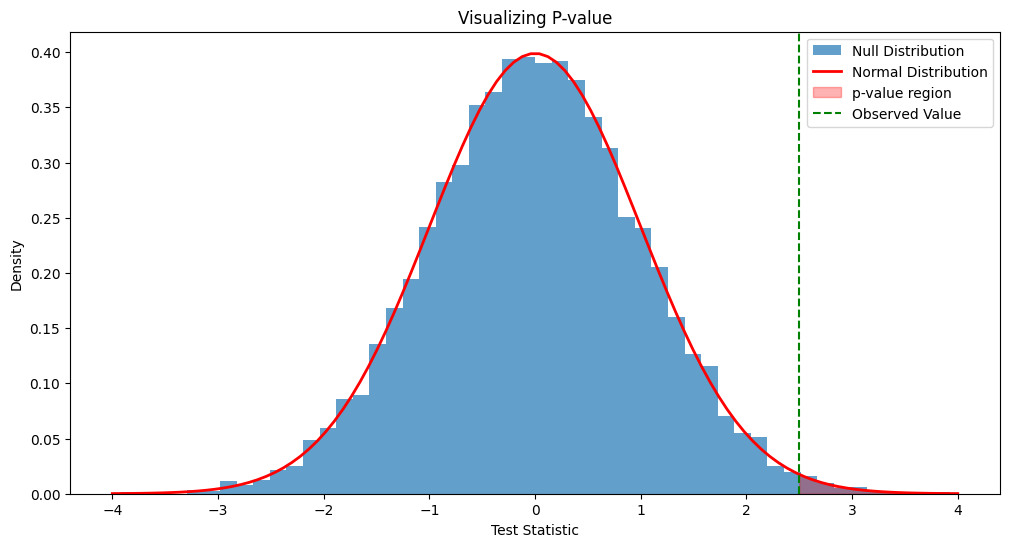

In [11]:
def demonstrate_p_value():
    # Set up the visualization
    np.random.seed(42)
    
    # Generate null distribution
    null_distribution = np.random.normal(loc=0, scale=1, size=10000)
    
    # Calculate observed test statistic (example)
    observed_value = 2.5
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot null distribution
    plt.hist(null_distribution, bins=50, density=True, alpha=0.7,
             label='Null Distribution')
    
    # Add normal curve
    x = np.linspace(-4, 4, 100)
    plt.plot(x, stats.norm.pdf(x), 'r-', lw=2, label='Normal Distribution')
    
    # Shade p-value region
    x_fill = np.linspace(observed_value, 4, 100)
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='red', alpha=0.3,
                    label='p-value region')
    
    # Add observed value line
    plt.axvline(x=observed_value, color='green', linestyle='--',
                label='Observed Value')
    
    plt.title('Visualizing P-value')
    plt.xlabel('Test Statistic')
    plt.ylabel('Density')
    plt.legend()
    
    # Calculate actual p-value
    p_value = 1 - stats.norm.cdf(observed_value)
    print(f"P-value: {p_value:.4f}")

demonstrate_p_value()

### Types of Errors

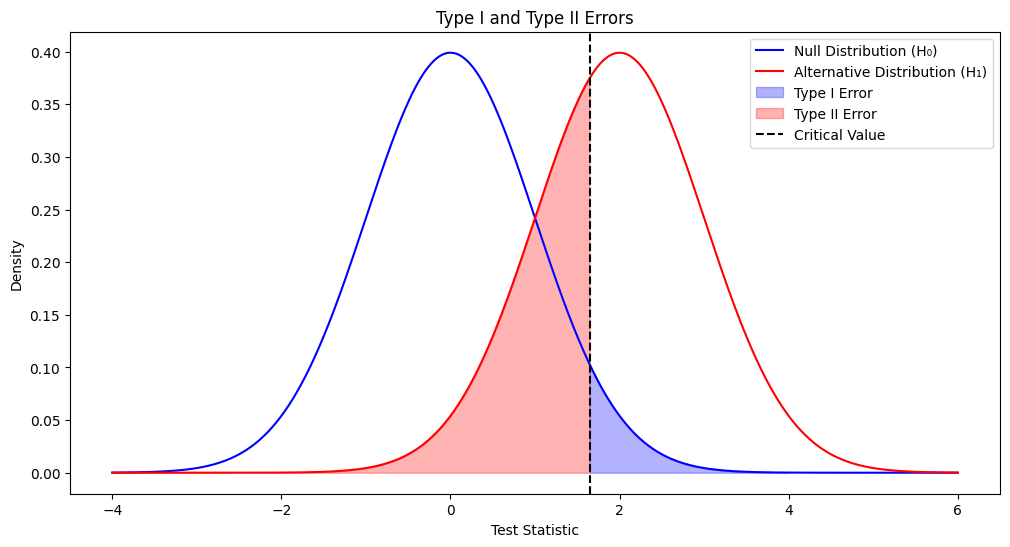

In [12]:
def demonstrate_type_errors():
    # Create a visualization of Type I and Type II errors
    
    # Parameters
    mu0 = 0  # null hypothesis mean
    mu1 = 2  # alternative hypothesis mean
    sigma = 1  # standard deviation
    alpha = 0.05  # significance level
    
    # Create x values for plotting
    x = np.linspace(-4, 6, 1000)
    
    # Calculate critical value
    critical_value = stats.norm.ppf(1 - alpha)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot null distribution
    plt.plot(x, stats.norm.pdf(x, mu0, sigma), 'b-', 
            label='Null Distribution (H₀)')
    
    # Plot alternative distribution
    plt.plot(x, stats.norm.pdf(x, mu1, sigma), 'r-', 
            label='Alternative Distribution (H₁)')
    
    # Shade Type I error
    x_type1 = np.linspace(critical_value, 4, 100)
    plt.fill_between(x_type1, stats.norm.pdf(x_type1, mu0, sigma),
                    color='blue', alpha=0.3, label='Type I Error')
    
    # Shade Type II error
    x_type2 = np.linspace(-4, critical_value, 100)
    plt.fill_between(x_type2, stats.norm.pdf(x_type2, mu1, sigma),
                    color='red', alpha=0.3, label='Type II Error')
    
    plt.axvline(x=critical_value, color='black', linestyle='--',
                label='Critical Value')
    
    plt.title('Type I and Type II Errors')
    plt.xlabel('Test Statistic')
    plt.ylabel('Density')
    plt.legend()

demonstrate_type_errors()

### Types of Statistical Tests

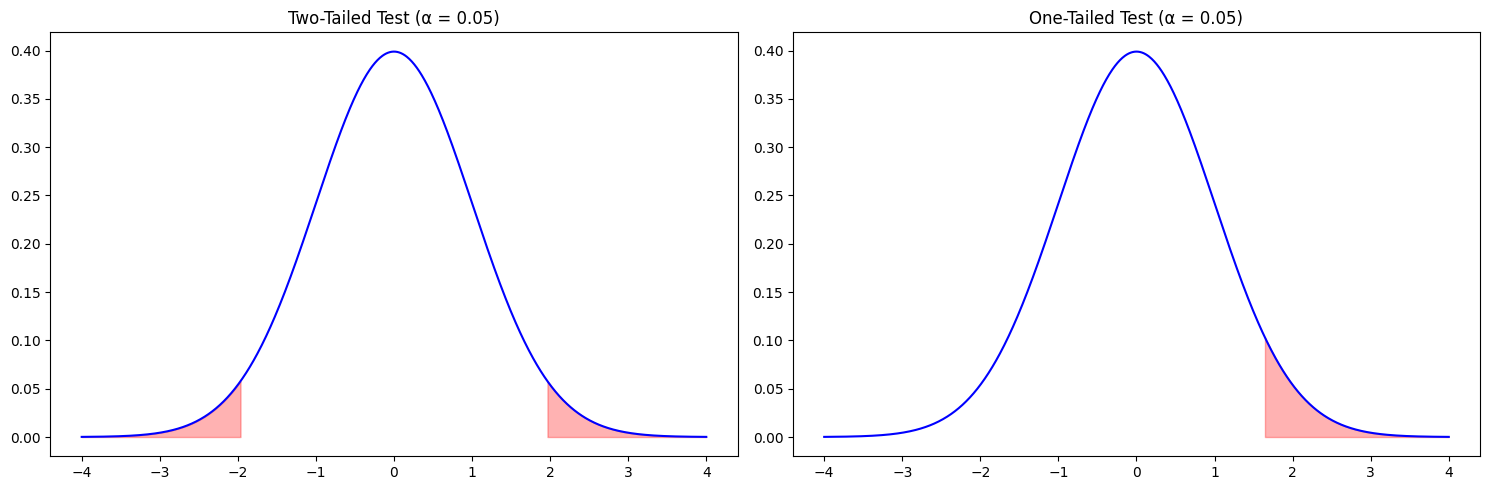

In [13]:
# One-Tailed vs Two-Tailed Tests
def demonstrate_tail_types():
    # Create visualization of one-tailed and two-tailed tests
    x = np.linspace(-4, 4, 1000)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Two-tailed test
    ax1.plot(x, stats.norm.pdf(x), 'b-')
    ax1.fill_between(x[x <= -1.96], stats.norm.pdf(x[x <= -1.96]), 
                    color='red', alpha=0.3)
    ax1.fill_between(x[x >= 1.96], stats.norm.pdf(x[x >= 1.96]), 
                    color='red', alpha=0.3)
    ax1.set_title('Two-Tailed Test (α = 0.05)')
    
    # One-tailed test
    ax2.plot(x, stats.norm.pdf(x), 'b-')
    ax2.fill_between(x[x >= 1.645], stats.norm.pdf(x[x >= 1.645]), 
                    color='red', alpha=0.3)
    ax2.set_title('One-Tailed Test (α = 0.05)')
    
    plt.tight_layout()

demonstrate_tail_types()

### Common Statistical Tests

One-Sample Z-Test Results:
Sample Mean: 101.62
Z-statistic: 0.7627
P-value: 0.4457


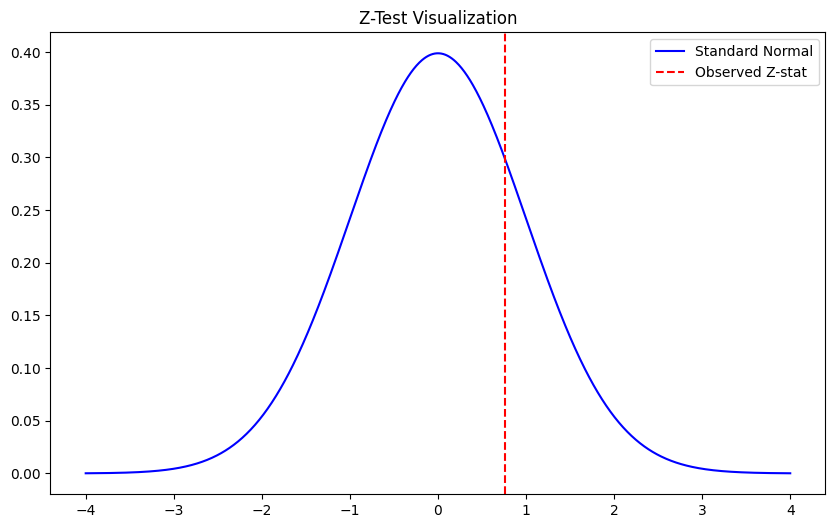

In [14]:
# 👉 1. Z-Test (One Sample)
# Used when:

# Population standard deviation is known
# Sample size is large (n ≥ 30)
# Data is normally distributed
def one_sample_z_test_example():
    # Generate sample data
    np.random.seed(42)
    population_mean = 100
    population_std = 15
    sample_size = 50
    
    # Generate sample
    sample = np.random.normal(loc=105, scale=population_std, size=sample_size)
    
    # Calculate z-statistic
    sample_mean = np.mean(sample)
    z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    
    # Calculate p-value (two-tailed)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    print("One-Sample Z-Test Results:")
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # Visualize
    plt.figure(figsize=(10, 6))
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, stats.norm.pdf(x), 'b-', label='Standard Normal')
    plt.axvline(x=z_stat, color='red', linestyle='--', label='Observed Z-stat')
    plt.title('Z-Test Visualization')
    plt.legend()

one_sample_z_test_example()


Independent T-Test Results:
Group 1 Mean: 97.18
Group 2 Mean: 108.18
T-statistic: -3.1030
P-value: 0.0030
Cohen's d: 0.8012


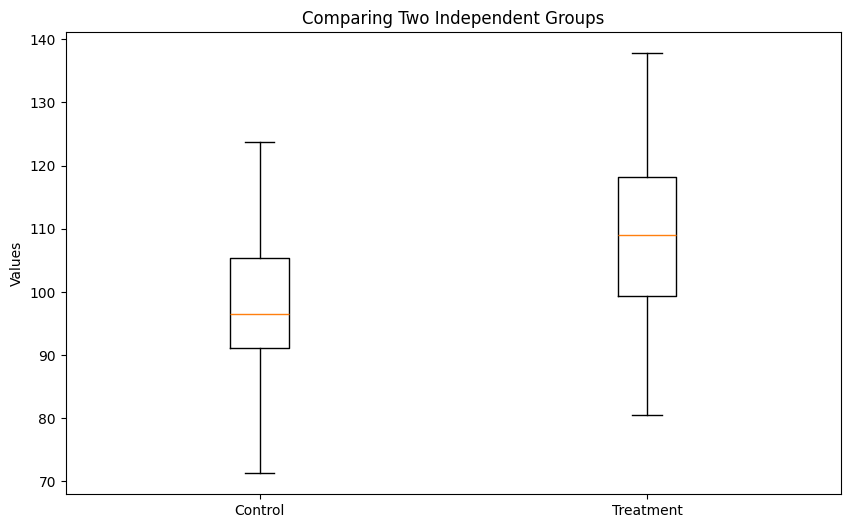

In [16]:
# 👉 2. T-Test
# Independent T-Test (Two Sample)
# Used when:

# Comparing means of two independent groups
# Population standard deviation unknown
# Data approximately normally distributed
def independent_t_test_example():
    # Generate sample data for two groups
    np.random.seed(42)
    
    # Group 1: Control group
    group1 = np.random.normal(loc=100, scale=15, size=30)
    
    # Group 2: Treatment group
    group2 = np.random.normal(loc=110, scale=15, size=30)
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Calculate effect size (Cohen's d)
    cohens_d = (np.mean(group2) - np.mean(group1)) / np.sqrt(
        ((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2))
    
    print("\nIndependent T-Test Results:")
    print(f"Group 1 Mean: {np.mean(group1):.2f}")
    print(f"Group 2 Mean: {np.mean(group2):.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Cohen's d: {cohens_d:.4f}")
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.boxplot([group1, group2], tick_labels=['Control', 'Treatment'])
    plt.title('Comparing Two Independent Groups')
    plt.ylabel('Values')

independent_t_test_example()


Paired T-Test Results:
Mean Difference: 9.39
T-statistic: -11.0523
P-value: 0.0000


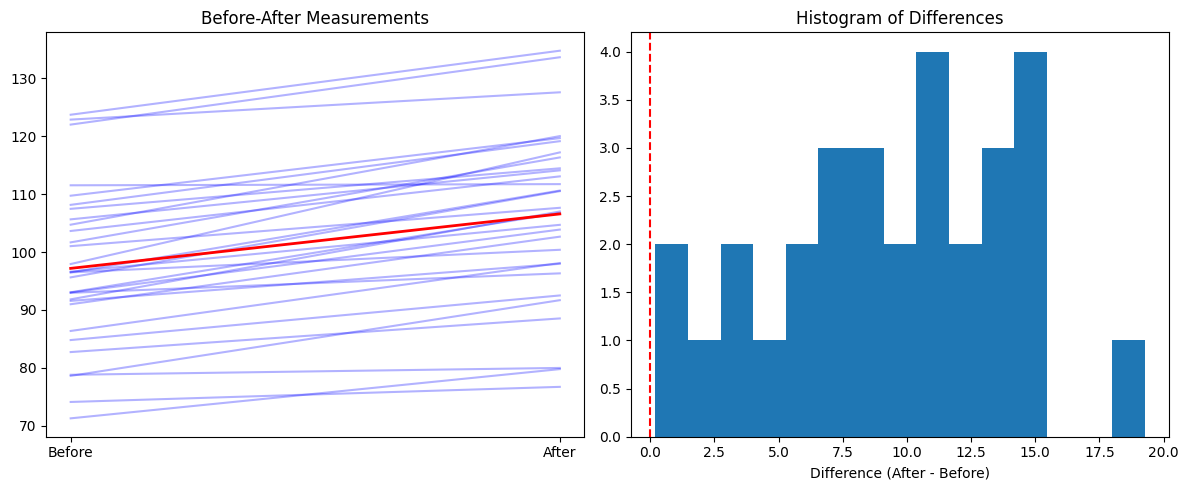

In [17]:
# Paired T-Test
# Used when:

# Comparing two related measurements
# Same subjects measured twice
# Data approximately normally distributed
def paired_t_test_example():
    # Generate paired data
    np.random.seed(42)
    n = 30
    
    # Before treatment
    before = np.random.normal(loc=100, scale=15, size=n)
    
    # After treatment (correlated with before, with some improvement)
    improvement = np.random.normal(loc=10, scale=5, size=n)
    after = before + improvement
    
    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(before, after)
    
    print("\nPaired T-Test Results:")
    print(f"Mean Difference: {np.mean(after - before):.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # Visualize
    plt.figure(figsize=(12, 5))
    
    # Before-After plot
    plt.subplot(121)
    plt.plot([1, 2], [before, after], 'b-', alpha=0.3)
    plt.plot([1, 2], [np.mean(before), np.mean(after)], 'r-', linewidth=2)
    plt.xticks([1, 2], ['Before', 'After'])
    plt.title('Before-After Measurements')
    
    # Difference histogram
    plt.subplot(122)
    plt.hist(after - before, bins=15)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histogram of Differences')
    plt.xlabel('Difference (After - Before)')
    
    plt.tight_layout()

paired_t_test_example()

### Choosing the Right Statistical Test

In [19]:
def create_test_selection_diagram():
    mermaid_code = '''
    graph TD
        A[Start] --> B{How many groups?}
        B -->|One group| C{Known population SD?}
        B -->|Two groups| D{Independent or Paired?}
        C -->|Yes| E[Z-test]
        C -->|No| F[One-sample t-test]
        D -->|Independent| G[Independent t-test]
        D -->|Paired| H[Paired t-test]
    '''
    return mermaid_code

print(create_test_selection_diagram())


    graph TD
        A[Start] --> B{How many groups?}
        B -->|One group| C{Known population SD?}
        B -->|Two groups| D{Independent or Paired?}
        C -->|Yes| E[Z-test]
        C -->|No| F[One-sample t-test]
        D -->|Independent| G[Independent t-test]
        D -->|Paired| H[Paired t-test]
    
